<a href="https://www.kaggle.com/code/janmartins/fraud-credit-cards-sept-2013-european?scriptVersionId=265585554" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
"""
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fraud-detection/creditcard.csv


In [2]:
df = pd.read_csv('/kaggle/input/fraud-detection/creditcard.csv')

# Informações gerais sobre o conjunto

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
"""
Esse é um problema de classificação desbalanceado. Se treinarmos um classificador
padrão (tipo uma regressão logística simples), provavelmente acertariamos quase
tudo como "não fraude", e ainda teria uma acurácia de mais de 99%, mas seria inútil.
"""
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# Analise de Outliers
Sabemos que para essa etapa vamos precisar olhar para quase todas as colunas.
Vamos olhar individualmente e em grupo para compreender como os outliers se relacionam com os nossos dados

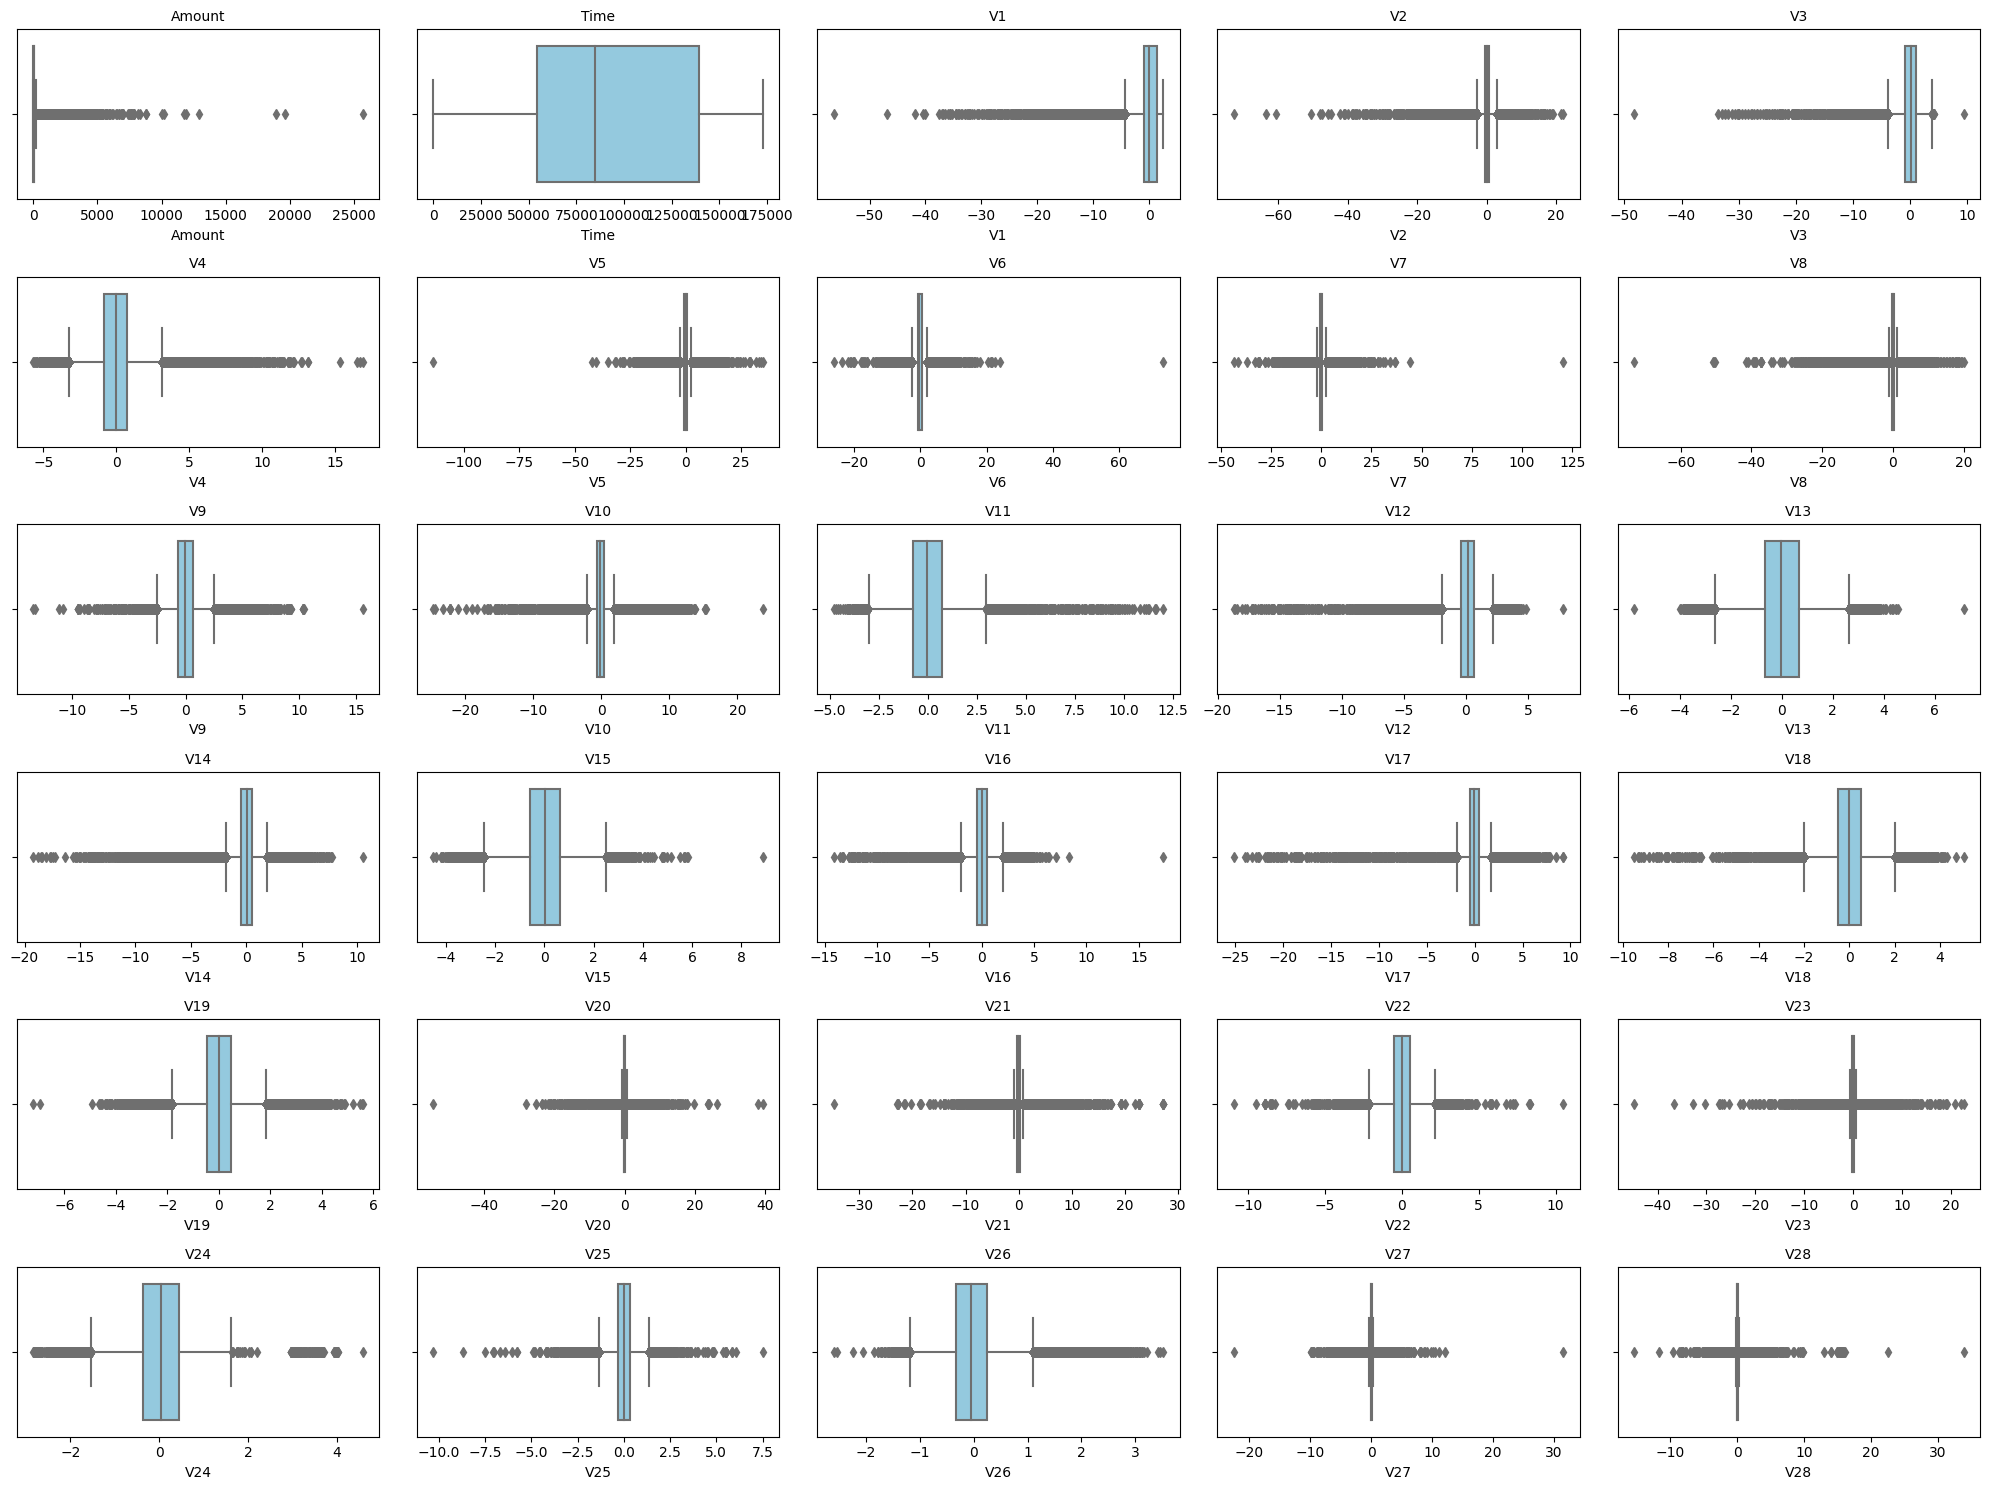

In [6]:
# Seleciona as colunas que queremos plotar
cols = ['Amount', 'Time'] + [f'V{i}' for i in range(1, 29)]

# Cria os subplots
plt.figure(figsize=(20, 15))

for i, col in enumerate(cols):
    plt.subplot(6, 5, i+1)  # 6 linhas, 5 colunas
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.show()


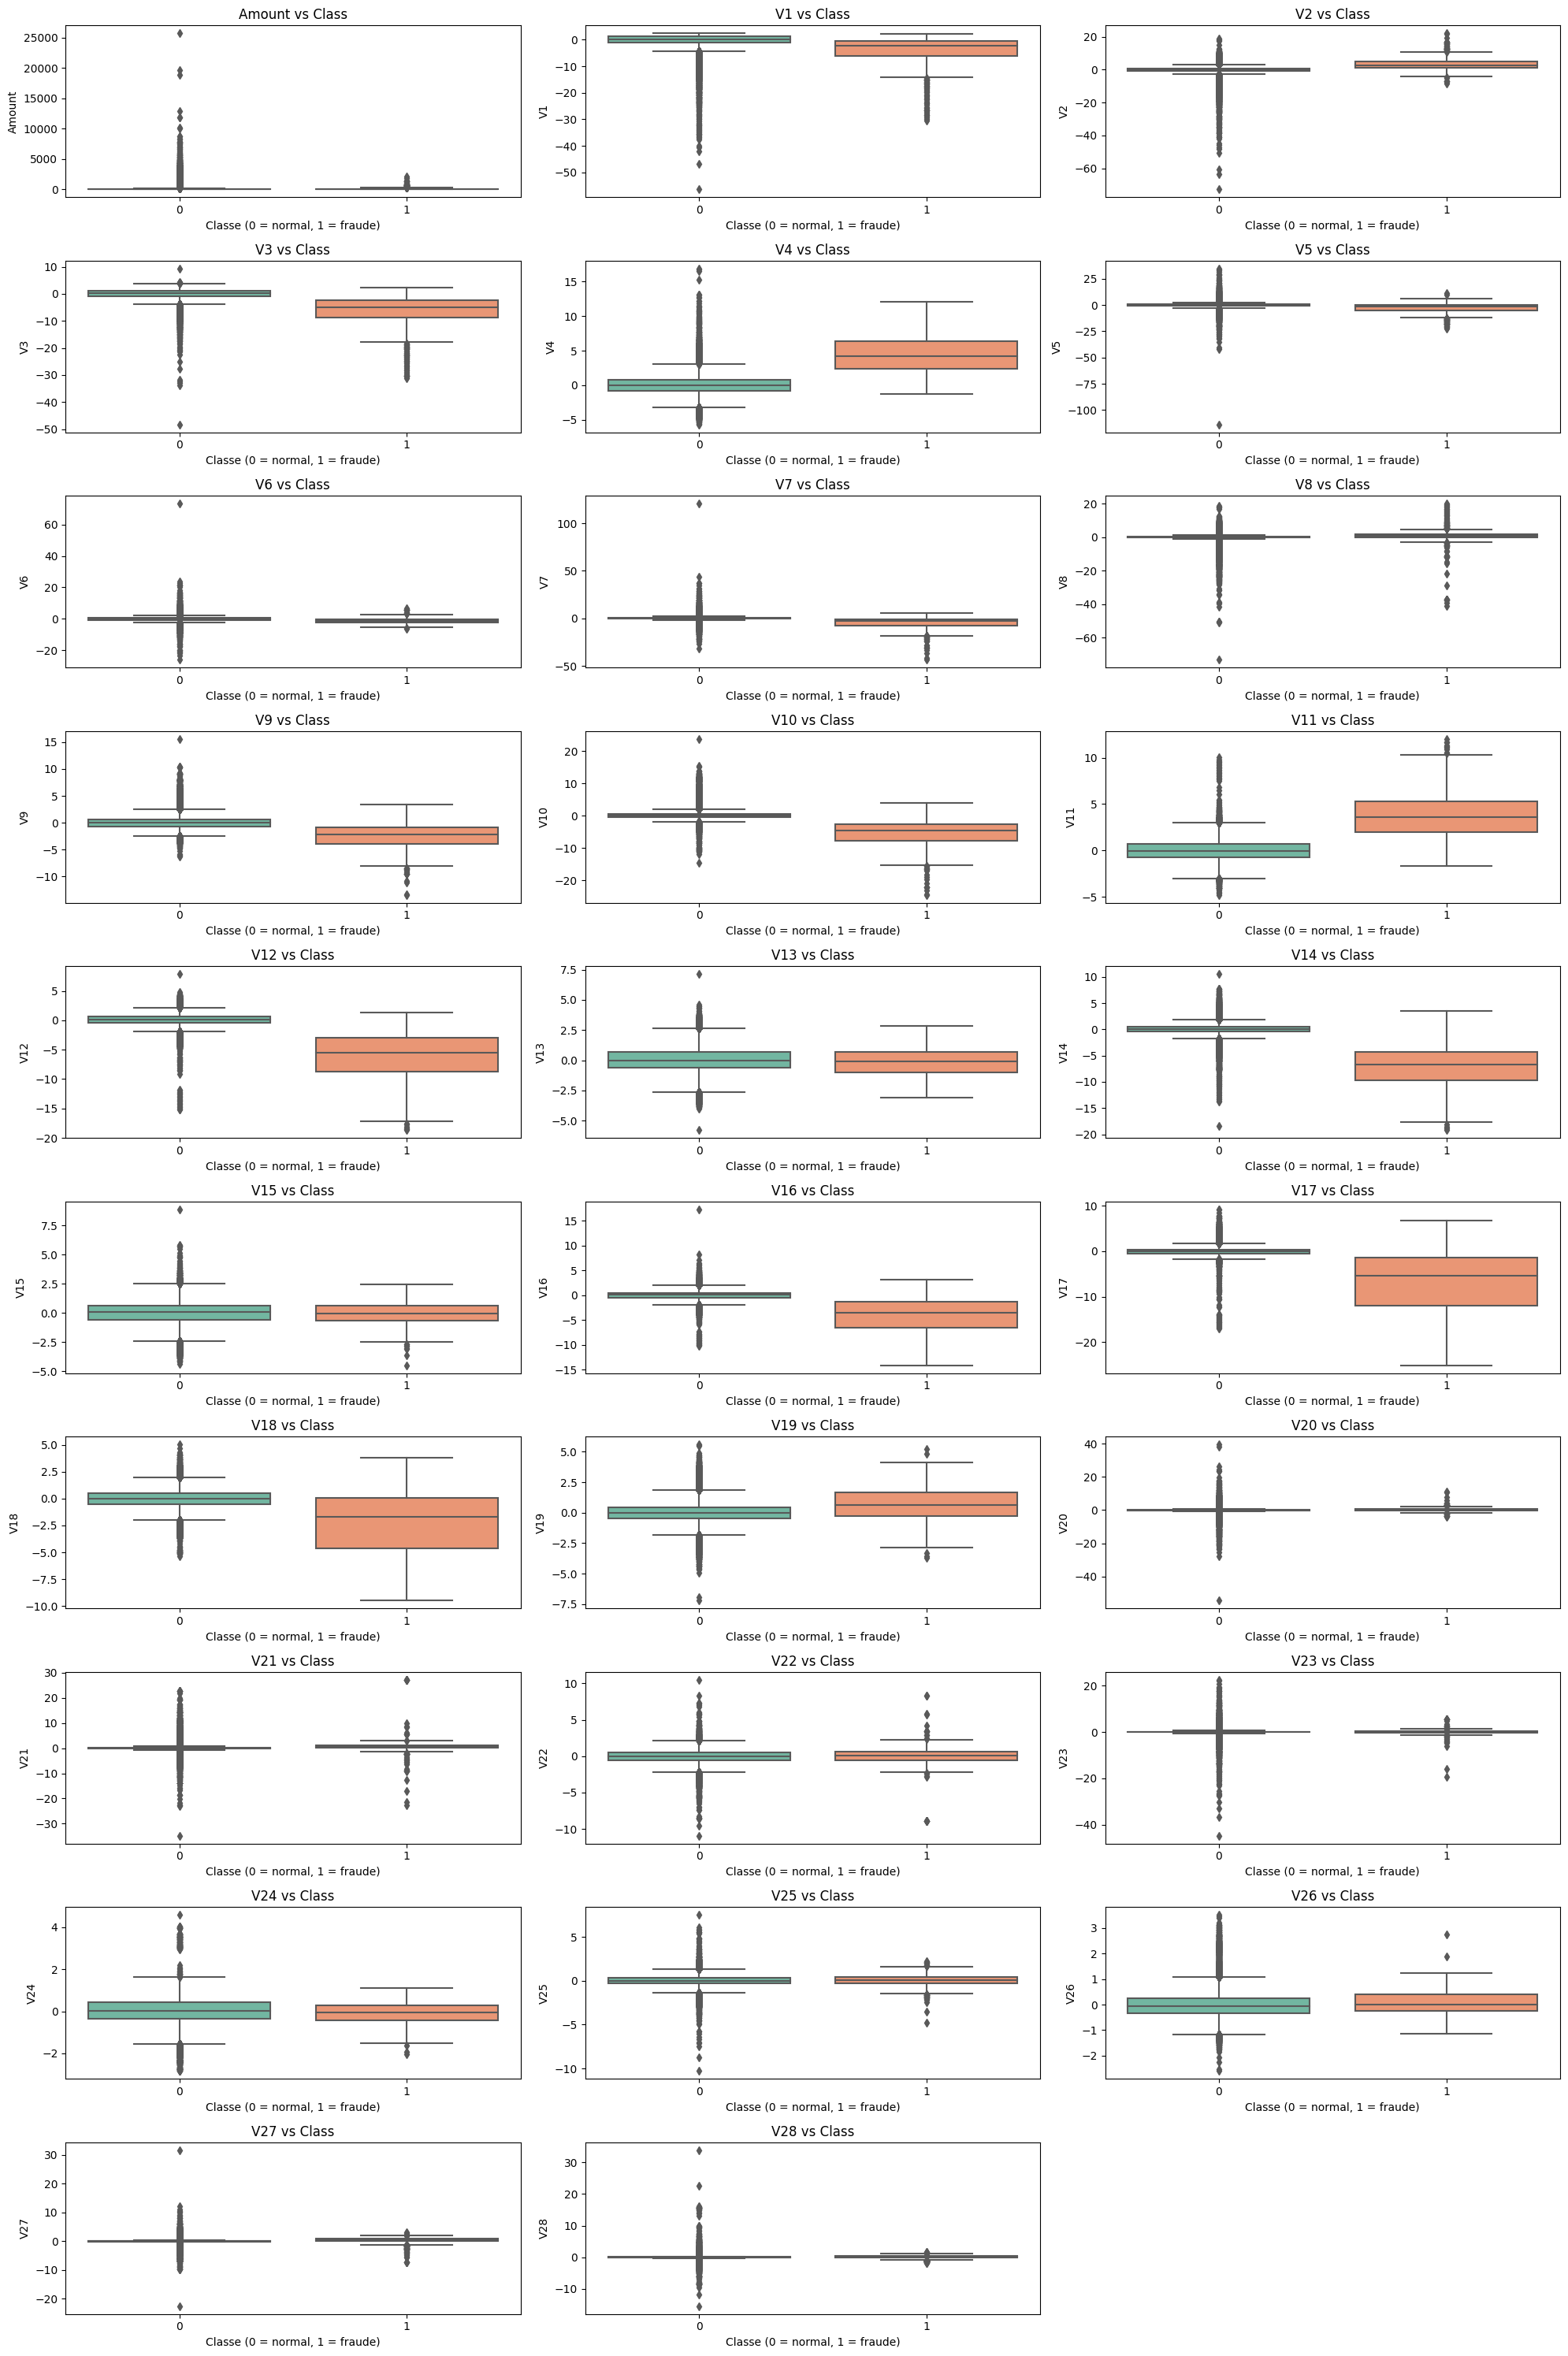

In [7]:
selected_cols = ['Amount'] + [f'V{i}' for i in range(1, 29)]

plt.figure(figsize=(20, 30))

n_cols = 3
n_rows = (len(selected_cols) + n_cols - 1) // n_cols  # calcula número de linhas necessárias

for i, col in enumerate(selected_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, x='Class', y=col, palette='Set2')
    plt.title(f'{col} vs Class')
    plt.xlabel('Classe (0 = normal, 1 = fraude)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [8]:
"""
Total de fraudes: 492 — esse é o universo total.

Fraudes entre outliers de Amount: 91 — ou seja, 
só cerca de 18,5% das fraudes totais estão nesses outliers.

Número total de outliers de Amount: 31.904 — ou seja, esses outliers são muitos,
mas a fraudes representam uma fatia minúscula disso.

Porcentagem de outliers que são fraudes: 0,29% — muito pequena,
então a maioria dos outliers de Amount são transações não fraudulentas.
"""


# Define os limites de outlier para 'Amount'
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filtra os outliers
amount_outliers = df[(df['Amount'] < lower) | (df['Amount'] > upper)]

# Taxa de fraudes dentro e fora dos outliers
fraude_total = df['Class'].sum()
fraude_outliers = amount_outliers['Class'].sum()
total_outliers = len(amount_outliers)

print(f'Fraudes no total do dataset: {fraude_total}')
print(f'Fraudes entre os outliers de Amount: {fraude_outliers}')
print(f'Outliers de Amount: {total_outliers}')
print(f'Porcentagem de outliers de Amount que são fraudes: {fraude_outliers / total_outliers * 100:.2f}%')

Fraudes no total do dataset: 492
Fraudes entre os outliers de Amount: 91
Outliers de Amount: 31904
Porcentagem de outliers de Amount que são fraudes: 0.29%


In [9]:
results = []

for col in [f'V{i}' for i in range(1, 29)]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    num_outliers = len(outliers)
    fraude_outliers = outliers['Class'].sum()
    
    pct_fraude_outliers = (fraude_outliers / num_outliers * 100) if num_outliers > 0 else 0
    
    results.append({
        'Feature': col,
        'Num Outliers': num_outliers,
        'Fraudes entre outliers': fraude_outliers,
        'Percentual Fraudes nos outliers': pct_fraude_outliers
    })

outliers_fraudes_df = pd.DataFrame(results)

outliers_fraudes_df=outliers_fraudes_df.sort_values(by='Percentual Fraudes nos outliers', ascending=False)

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [11]:
outliers_fraudes_df.head(20)

,Feature,Num Outliers,Fraudes entre outliers,Percentual Fraudes nos outliers
10,V11,780,294,37.692308
2,V3,3363,312,9.277431
16,V17,7420,397,5.350404
15,V16,8184,351,4.288856
9,V10,9496,399,4.201769
6,V7,8948,301,3.363880
17,V18,7533,237,3.146157
13,V14,14149,430,3.039084
3,V4,11148,318,2.852530
8,V9,8283,223,2.692261


# Modelos

In [12]:
# pip install -U scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [14]:
# Criação da feature binária: é outlier em V11
Q1 = df['V11'].quantile(0.25)
Q3 = df['V11'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['V11_outlier'] = ((df['V11'] < lower) | (df['V11'] > upper)).astype(int)

In [15]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [17]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smote, y_train_smote)

# Avaliar no teste
y_pred = model.predict(X_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# AUC-ROC
y_proba = model.predict_proba(X_test)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.78      0.82       148

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC: 0.9486784339882411


AUC-ROC: 0.95, o que indica que o modelo separa bem fraudes de não fraudes

Classe 0 (normal): o modelo identifica corretamente quase todas as transações normais.

Classe 1 (fraude):

Recall = 0.78: o modelo encontra 78% das fraudes.

Precision = 0.86: das transações que o modelo classificou como fraude, 86% realmente eram fraude.

Isso mostra que o modelo não está simplesmente chutando tudo como normal, o que já é um grande avanço em problemas desbalanceados.
----------------------------------------------------------------------------------

* Aplicar SMOTE para balancear os dados

* Incluir variável de outlier em V11

* Escolher um modelo robusto como Random Forest

* Usar métricas certas (recall, F1, AUC)